<a href="https://colab.research.google.com/github/ortegatiago/covid19_analysis/blob/master/covid19_prediction_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID 19 Predictions using python ARIMA**

Author: Ortega, Tiago

email: ortega.tiago@gmail.com

github: https://github.com/ortegatiago

linkedin: https://www.linkedin.com/in/ortegatiago/

In [ ]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/consolidated_covid_19_data.csv'
                , sep=','
                , encoding='utf-8')

df.Last_Update = pd.to_datetime(df.Last_Update)
df.Last_Update = df.Last_Update.dt.date
df.Last_Update = pd.to_datetime(df.Last_Update)


df = df[['Country_Region','Last_Update', 'Confirmed', 'Deaths', 'Recovered']]

df = df.loc[df['Country_Region']=='Brazil',  ['Last_Update', 'Confirmed']]
df = df.groupby('Last_Update').sum().reset_index()
df.set_index('Last_Update', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2020-03-22 to 2020-07-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  124 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


In [ ]:
df.tail()

,Confirmed
Last_Update,
2020-07-20,2098389
2020-07-21,2118646
2020-07-22,2159654
2020-07-23,2227514
2020-07-24,2287475


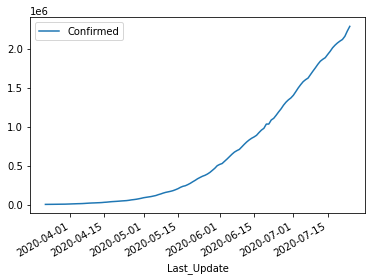

In [ ]:
df.plot()

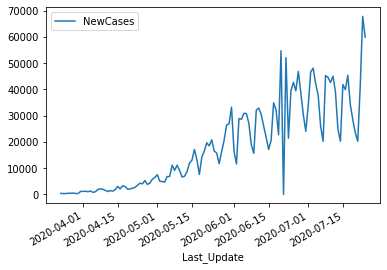

In [ ]:
df['NewCases'] = df['Confirmed'].diff(1)
df.drop('Confirmed', inplace=True, axis=1)
df.dropna(inplace=True)
df.plot()

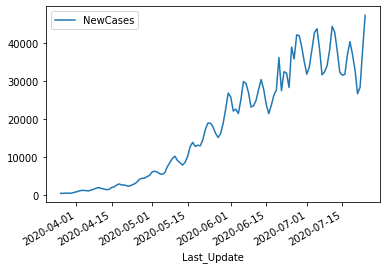

In [ ]:
df_test = df.copy()
df_test = df_test.rolling(window=4).mean()
df_test.dropna(inplace=True)
df_test.plot()


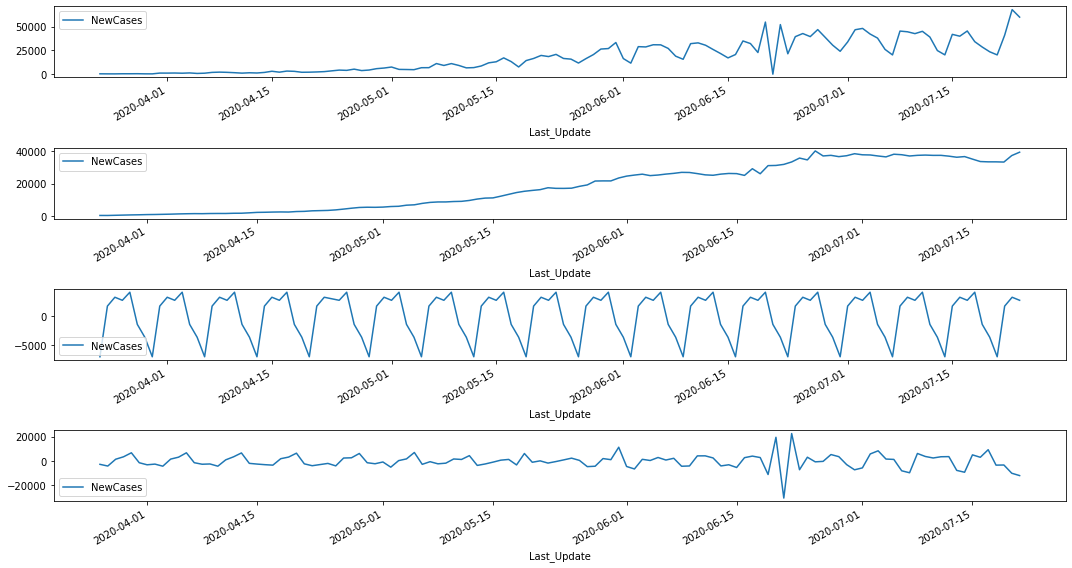

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonplot = seasonal_decompose(df, freq=7)
# plotar a decomposicao
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,8))
seasonplot.observed.plot(ax=ax1)
seasonplot.trend.plot(ax=ax2)
seasonplot.seasonal.plot(ax=ax3)
seasonplot.resid.plot(ax=ax4)
plt.tight_layout()

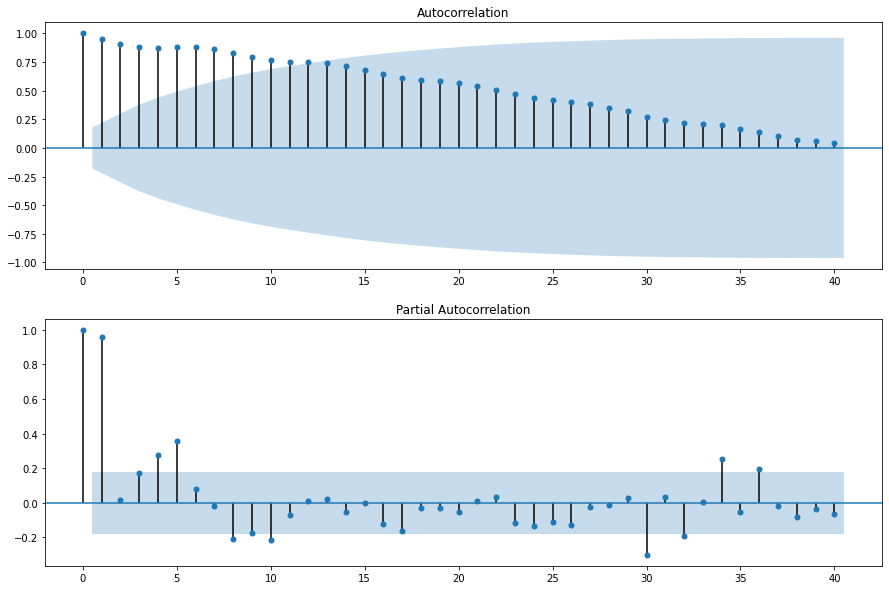

In [ ]:
import statsmodels.api as sm
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
sm.graphics.tsa.plot_acf(df_test, lags=40, ax=ax1)
sm.graphics.tsa.plot_pacf(df_test, lags=40, ax=ax2)
plt.show()

In [ ]:
df.shape

(123, 1)

In [ ]:
df.tail()

,NewCases
Last_Update,
2020-07-20,23529.0
2020-07-21,20257.0
2020-07-22,41008.0
2020-07-23,67860.0
2020-07-24,59961.0


In [ ]:
X = df
train = X[0:119]
test = X[119:]

In [163]:
model = ARIMA(train, order=(4,1,2))
#model = ARIMA(train, order=(6,2,4))
#model = ARIMA(train, order=(7, 2, 5))

model_fit = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [ ]:
model_fit.aic

2381.6828386390844

In [221]:
periods = 4

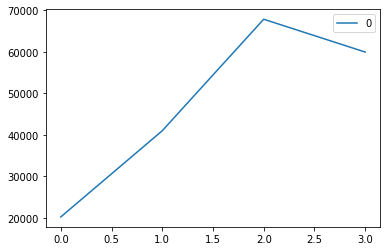

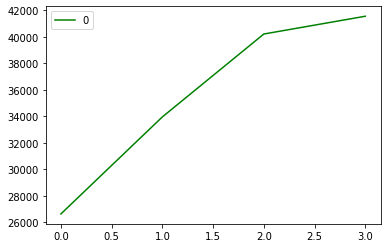

In [222]:
predictions = model_fit.forecast(steps=periods)
pd.DataFrame(test.values).plot()
pd.DataFrame(predictions[0]).plot(color='green')


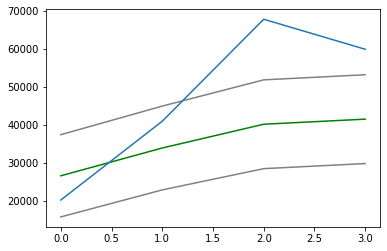

In [223]:
plt.plot(pd.DataFrame(predictions[0]) , color='green')
plt.plot(pd.DataFrame(predictions[2]), color='gray')
plt.plot(test.values)

In [178]:
from sklearn.metrics import mean_squared_error

In [224]:
np.sqrt(mean_squared_error(test.values, predictions[0], squared=True))

17274.43135010997

In [225]:
mean_squared_error(test.values, predictions[0], squared=False)

17274.43135010997

In [226]:
import itertools
p=d=q=range(0,6)
a=99999
pdq=list(itertools.product(p,d,q))

#Determining the best parameters
for var in pdq:
    try:
        model = ARIMA(train, order=var)
        result = model.fit()

        if (result.aic<=a) :
            a=result.aic
            param=var
    except:
        continue
param        

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided,

(7, 2, 5)

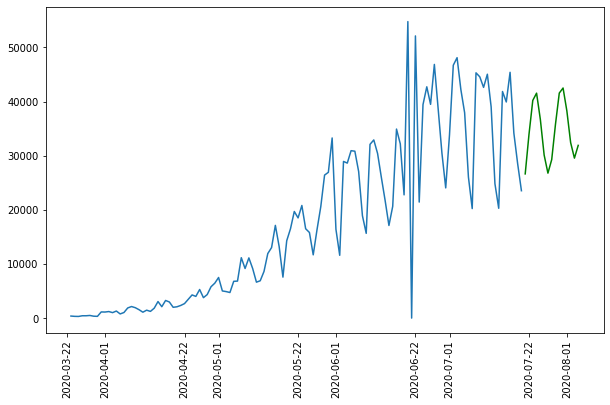

In [220]:
df_new = pd.concat([pd.DataFrame(pd.date_range(start='2020-07-21', periods=periods, freq='D')), pd.DataFrame(predictions[0])], axis=1)
df_new.columns = ['Date', 'Predictions']
df_new.set_index('Date', inplace=True, drop=True)

plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
#plt.axis(list(train.index.values)) 
plt.plot(train)
plt.plot(df_new, color='green')